In [1]:
import numpy as np

import matplotlib.pyplot as plt

#%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D, BatchNormalization

from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print("dataset shape",x.shape)
print("labels shape",y.shape)
train_size=0.6
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=train_size)
print("training data",x_train.shape)
print("training labels",y_train.shape)
print("testing data",x_test.shape)
print("testing labels",y_test.shape)

dataset shape (70000, 28, 28)
labels shape (70000,)
training data (42000, 28, 28)
training labels (42000,)
testing data (28000, 28, 28)
testing labels (28000,)


/home/gitanjali/anaconda3/envs/intel_python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


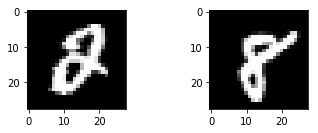

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [5]:
x_train=np.expand_dims(x_train, axis=3)
x_test=np.expand_dims(x_test, axis=3)

input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])
print("input_shape",input_shape)

# precise the pixel value to be 32 bit
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize input from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.

print("normalize training data", x_train.shape)
print("normalize testing data", x_test.shape)
print("training labels", y_train.shape)
print("testing labels", y_test.shape)

input_shape (28, 28, 1)
normalize training data (42000, 28, 28, 1)
normalize testing data (28000, 28, 28, 1)
training labels (42000,)
testing labels (28000,)


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Conv2D(128, 3, strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.001, momentum = 0.9, decay = 1e-6)

In [10]:
model.compile(optimizer=sgd,
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=200)


Train on 42000 samples, validate on 28000 samples
Epoch 1/50
42000/42000 [==============================] - 64s 2ms/sample - loss: 2.1527 - accuracy: 0.3405 - val_loss: 2.2570 - val_accuracy: 0.1105
Epoch 2/50
42000/42000 [==============================] - 58s 1ms/sample - loss: 1.8620 - accuracy: 0.6651 - val_loss: 1.9253 - val_accuracy: 0.6317
Epoch 3/50
42000/42000 [==============================] - 58s 1ms/sample - loss: 1.7472 - accuracy: 0.7595 - val_loss: 1.6775 - val_accuracy: 0.8201
Epoch 4/50
42000/42000 [==============================] - 63s 1ms/sample - loss: 1.6876 - accuracy: 0.8060 - val_loss: 1.6281 - val_accuracy: 0.8445
Epoch 5/50
42000/42000 [==============================] - 59s 1ms/sample - loss: 1.6518 - accuracy: 0.8402 - val_loss: 1.5740 - val_accuracy: 0.9213
Epoch 6/50
42000/42000 [==============================] - 59s 1ms/sample - loss: 1.6067 - accuracy: 0.8902 - val_loss: 1.5439 - val_accuracy: 0.9355
Epoch 7/50
42000/42000 [==============================] 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  7

In [17]:
from keras.models import model_from_json
# save trained model
# serialize model to JSON
model_json = model.to_json()
with open("Q3_part2_mnist_trained_model_sgd_50_epochs_variation1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and saving the weights
model.save_weights("Q3_part2_mnist_trained_model_sgd_50_epochs_variation1.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


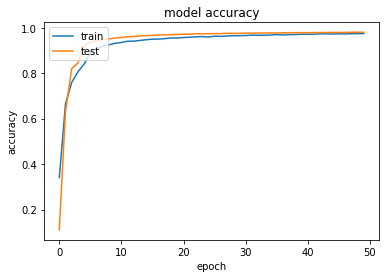

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

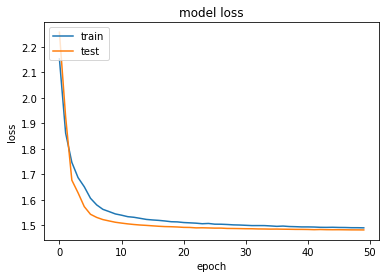

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test)

print("Accuracy : %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

28000/28000 [==============================] - 22s 786us/sample - loss: 1.4827 - accuracy: 0.9801
Accuracy : 98.01%
Baseline Error: 1.99%


In [19]:
import tensorflow as tf
y= model.predict(x_test)
print(y.shape)
y_pred = np.argmax(y, axis=1)
print(y_pred.shape)

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred )
print(con)

(28000, 10)
(28000,)
tf.Tensor(
[[2709    3    4    0    1    8    5    4    7    4]
 [   0 3037   11    4    0    2    1   12    3    0]
 [   5    5 2776   12    6    2    1   45   11    4]
 [   1    2   16 2786    0   13    0   18    4    7]
 [   6    2    2    0 2683    0   19    0    7   25]
 [   6    1    4    6    4 2472   11    4   10    2]
 [   9    4    0    0    6   10 2663    0    2    2]
 [   4    6   23    6    5    1    0 2887    2   13]
 [   1    1    7    1    8   12   13    7 2736   14]
 [   8    3    0    2   13   19    1   15    9 2694]], shape=(10, 10), dtype=int32)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2745
           1       0.99      0.99      0.99      3070
           2       0.98      0.97      0.97      2867
           3       0.99      0.98      0.98      2847
           4       0.98      0.98      0.98      2744
           5       0.97      0.98      0.98      2520
           6       0.98      0.99      0.98      2696
           7       0.96      0.98      0.97      2947
           8       0.98      0.98      0.98      2800
           9       0.97      0.97      0.97      2764

   micro avg       0.98      0.98      0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000

